<a href="https://colab.research.google.com/github/susmoy15/Machine_Learning/blob/main/Feature_Enginnering(Standardization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Engineering**
**1.Feature Transformation**
**2.Feature Construction**
**3.Feature Selection**
**4.Feature Extraction**

# **#Feature Scaling:**
1.Standardization ▶
2.Normalization ▶  

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df=df.iloc[:,2:]

In [ ]:
df.sample(5)

,Age,EstimatedSalary,Purchased
94,29,83000,0
302,37,137000,1
207,52,114000,0
259,45,131000,1
266,40,75000,0


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.35,
                                                    random_state=0)

X_train.shape, X_test.shape

((260, 2), (140, 2))

# **StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([3.77653846e+01, 6.92269231e+04])

In [ ]:
X_train

,Age,EstimatedSalary
164,33,69000
186,20,82000
30,31,74000
114,42,80000
263,35,72000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [ ]:
X_train_scaled

array([[-0.46745136, -0.00670538],
       [-1.74266169,  0.3774336 ],
       [-0.66363756,  0.14104038],
       [ 0.41538656,  0.31833529],
       [-0.27126516,  0.08194207],
       [-0.46745136,  2.35722681],
       [ 0.21920036,  0.05239292],
       [ 1.29822448,  2.26857935],
       [ 0.80775897,  0.28878614],
       [-0.27126516,  0.17058953],
       [ 0.02301415, -0.53859013],
       [-0.17317205,  0.17058953],
       [-0.07507895,  0.25923699],
       [ 0.02301415, -0.2430986 ],
       [ 2.1810624 ,  1.14571156],
       [-1.74266169,  0.3774336 ],
       [ 1.88678309,  0.14104038],
       [ 0.41538656, -0.12490199],
       [-1.15410307,  0.31833529],
       [ 0.80775897,  1.41165393],
       [-0.27126516, -0.2430986 ],
       [-1.64456858, -0.03625454],
       [-0.95791687, -0.7454342 ],
       [ 0.31729346,  0.52517936],
       [-0.07507895, -1.07047487],
       [-1.05600997,  0.61382682],
       [ 0.12110725, -0.8045325 ],
       [-0.95791687,  1.58894885],
       [-0.66363756,

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,260.0,260.0
mean,37.8,69226.9
std,10.2,33907.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70000.0
75%,46.0,86000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,260.0,260.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.4


# **Effect of Scaling**

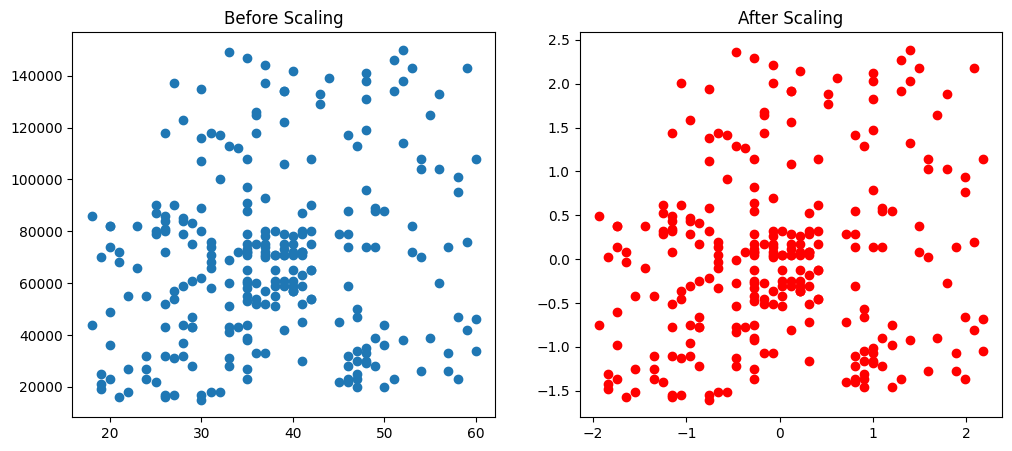

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

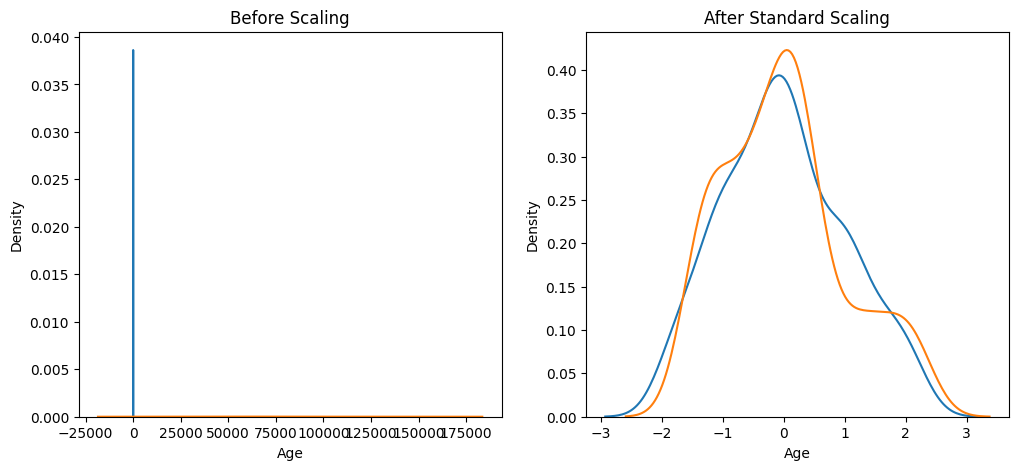

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# **Comparison of Distributions**

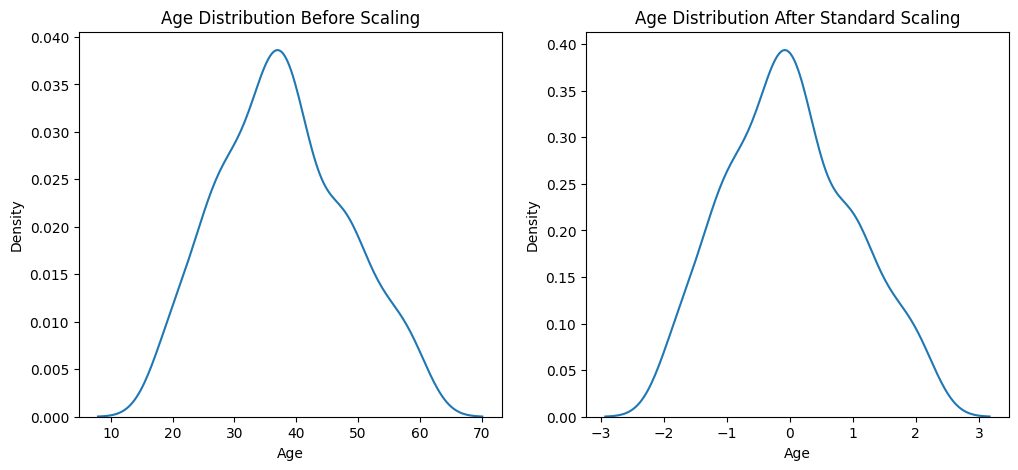

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

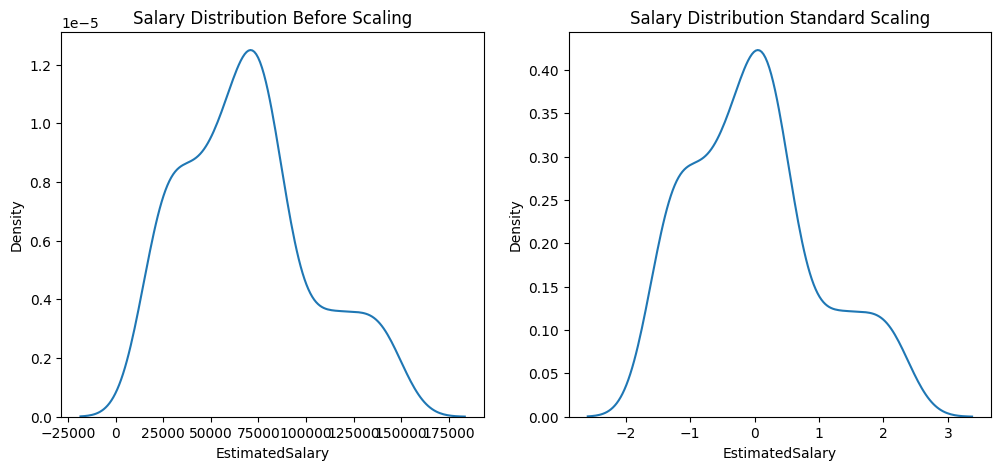

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# **Why scaling is important?**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8642857142857143
Scaled 0.8571428571428571


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [ ]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.85
Scaled 0.8571428571428571


In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
